# Analysing the 'Automobile Data Set' from the UC Irvine Machine Learning repository

This notebook is used to analyze the 'Automobile Data Set' from the UC Irvine Machine Learning repository. The dataset is available [here](https://archive.ics.uci.edu/ml/datasets/Automobile). **The objective is to create a model to predict car prices base on its attributes**.

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

The notebook is divided as follows:
    
1. Data exploration
2. Train ML model
3. Evaluate the ML model
4. Conclusion

In this notebook we test different regression models. Moreover, **only the numerical variables will be considered in the models**. Therefore, all the categorical variables will be ignored.

----------

## 1. Data exploration

In this section, we explore the characteristics of the dataset, including its dimensions and characteristics of its variables.

The dataset contains only 25 columns and 205 lines. The attributes for each column are upload from the website.

In [1]:
import pandas as pd
import numpy as np

----------

### Getting the data

In [2]:
attributes = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
           'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type',
           'num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower',
           'peak_rpm','city_mpg','highway_mpg','price']
df_data = pd.read_csv('/Users/leuzinger/Dropbox/Data Science/Awari/Regressions/Automobile Data Set/imports-85(1).data',names=attributes)
df_data.reset_index(inplace=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

----------

### Data Cleaning

After importing the data, we need to do some data cleaning. For now, we just substitute the "?" values by NaN. We also transform some numerical columns that were objects to float. Finally, we drop all the rows without a price for the car, as they do not help us train our model. Finally, as we will only consider the numerical variables in this notebook, we will drop all the columns with categorical values.

In [4]:
df_data['num_of_doors'].replace("?","four",inplace=True)
df_data.replace("?",np.nan,inplace=True)
df_data.dropna(subset = ["price"], inplace=True)
num_cols = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price']
df_data[num_cols] = df_data[num_cols].apply(pd.to_numeric, errors='coerce')

cat_cols = df_data.select_dtypes(include=['object', 'bool']).columns

df_data.drop(columns=cat_cols, inplace=True)

df_data.reset_index(drop=True,inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   wheel_base         201 non-null    float64
 3   length             201 non-null    float64
 4   width              201 non-null    float64
 5   height             201 non-null    float64
 6   curb_weight        201 non-null    int64  
 7   engine_size        201 non-null    int64  
 8   bore               197 non-null    float64
 9   stroke             197 non-null    float64
 10  compression_ratio  201 non-null    float64
 11  horsepower         199 non-null    float64
 12  peak_rpm           199 non-null    float64
 13  city_mpg           201 non-null    int64  
 14  highway_mpg        201 non-null    int64  
 15  price              201 non-null    int64  
dtypes: float64(10), int64(6)
m

### Data visualization

A "quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute" (GÉRON, 2019).

Therefore, we will start our analysis making some histograms that are useful for understanding the dataset. We see that some histograms are tail-heavy: they extend much farther to the right of the median than to the left. Besides, only few attributes seems to have a normal distribution.

Next, we can look to which attributes have the higher correlation with the price. First, we create a correlation matrix. Then, we make some scatter plots and a heatmap to vizualaize the correlations. **We can see that the varibales that have the stronger postive correlations with the car price are the engine size, curb weight, horsepower, and width. Besides, city mpg and highway mpg have a strong negative correlation with the price**.

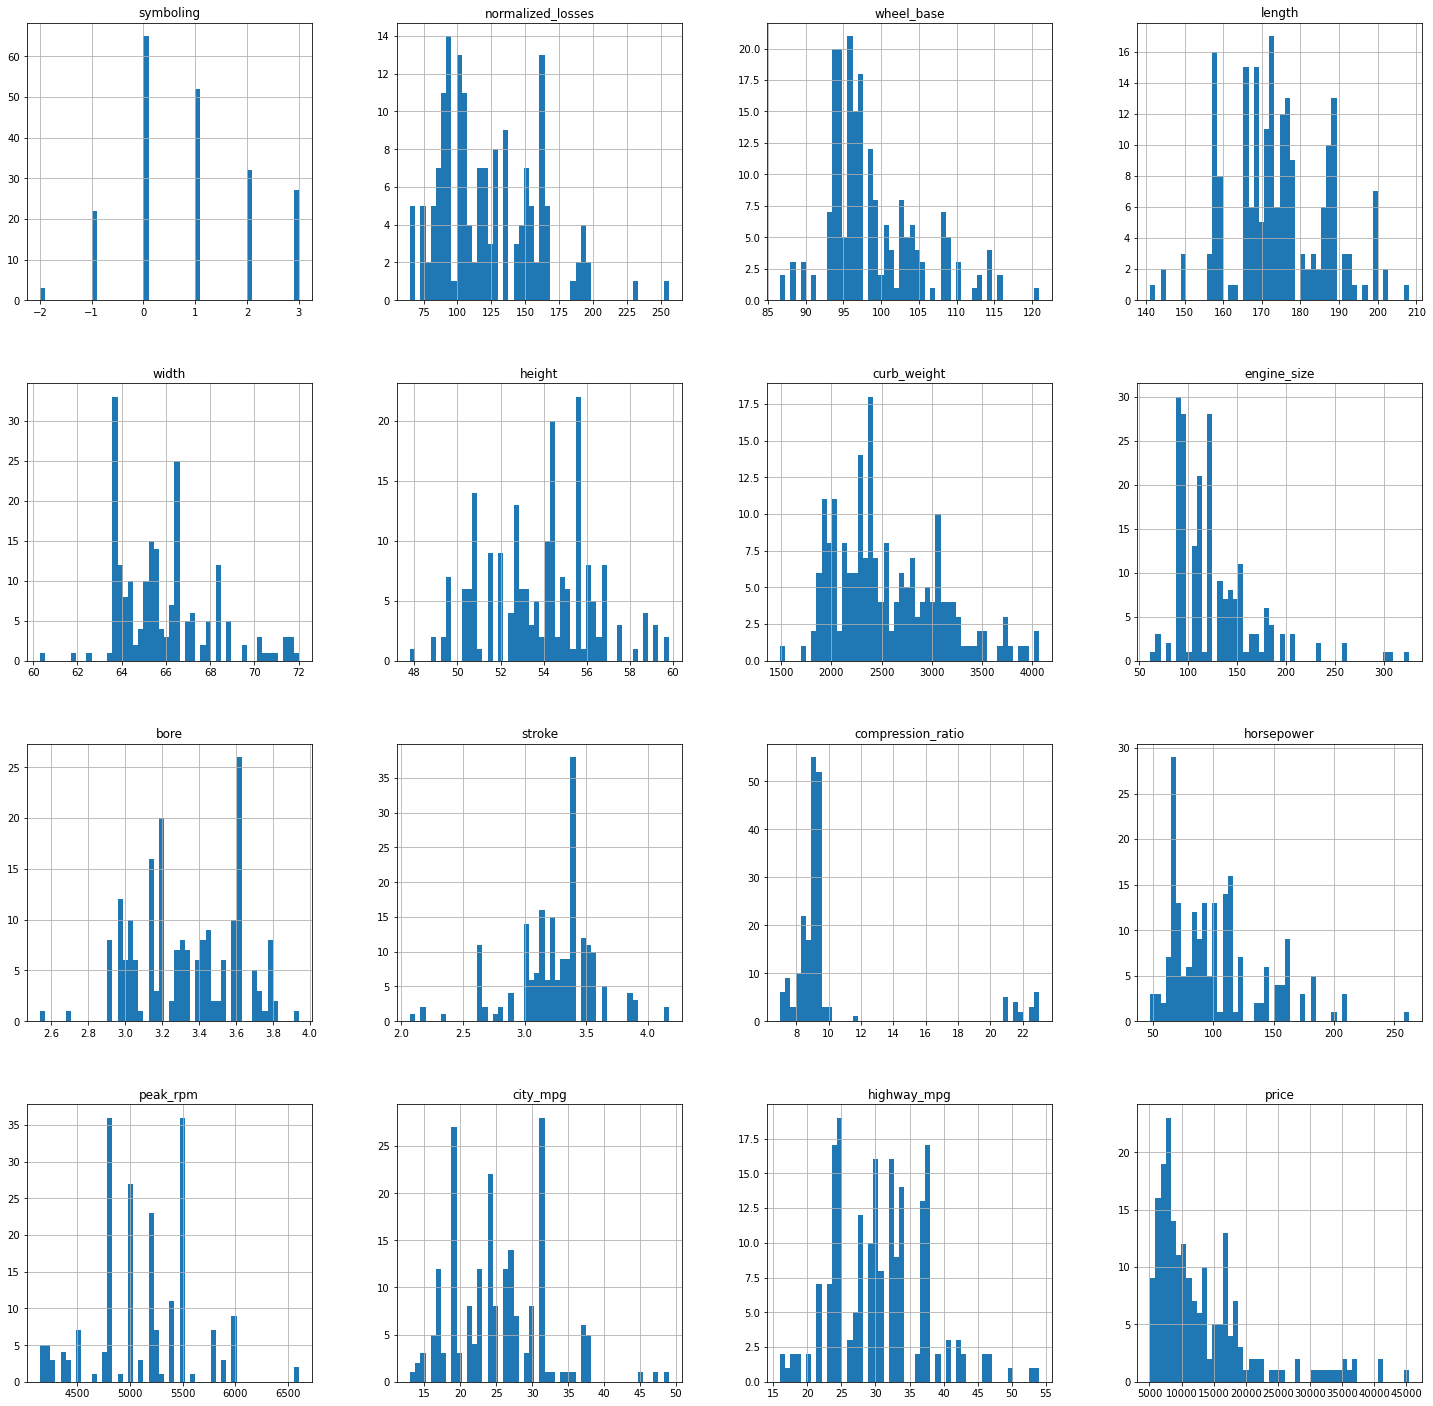

In [5]:
import matplotlib.pyplot as plt

df_data.hist(bins=50,figsize=(25, 25))

plt.show()

In [6]:
corr_matrix = df_data.corr()
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
engine_size          0.872335
curb_weight          0.834415
horsepower           0.810533
width                0.751265
length               0.690628
wheel_base           0.584642
bore                 0.543436
normalized_losses    0.203254
height               0.135486
stroke               0.082310
compression_ratio    0.071107
symboling           -0.082391
peak_rpm            -0.101649
city_mpg            -0.686571
highway_mpg         -0.704692
Name: price, dtype: float64

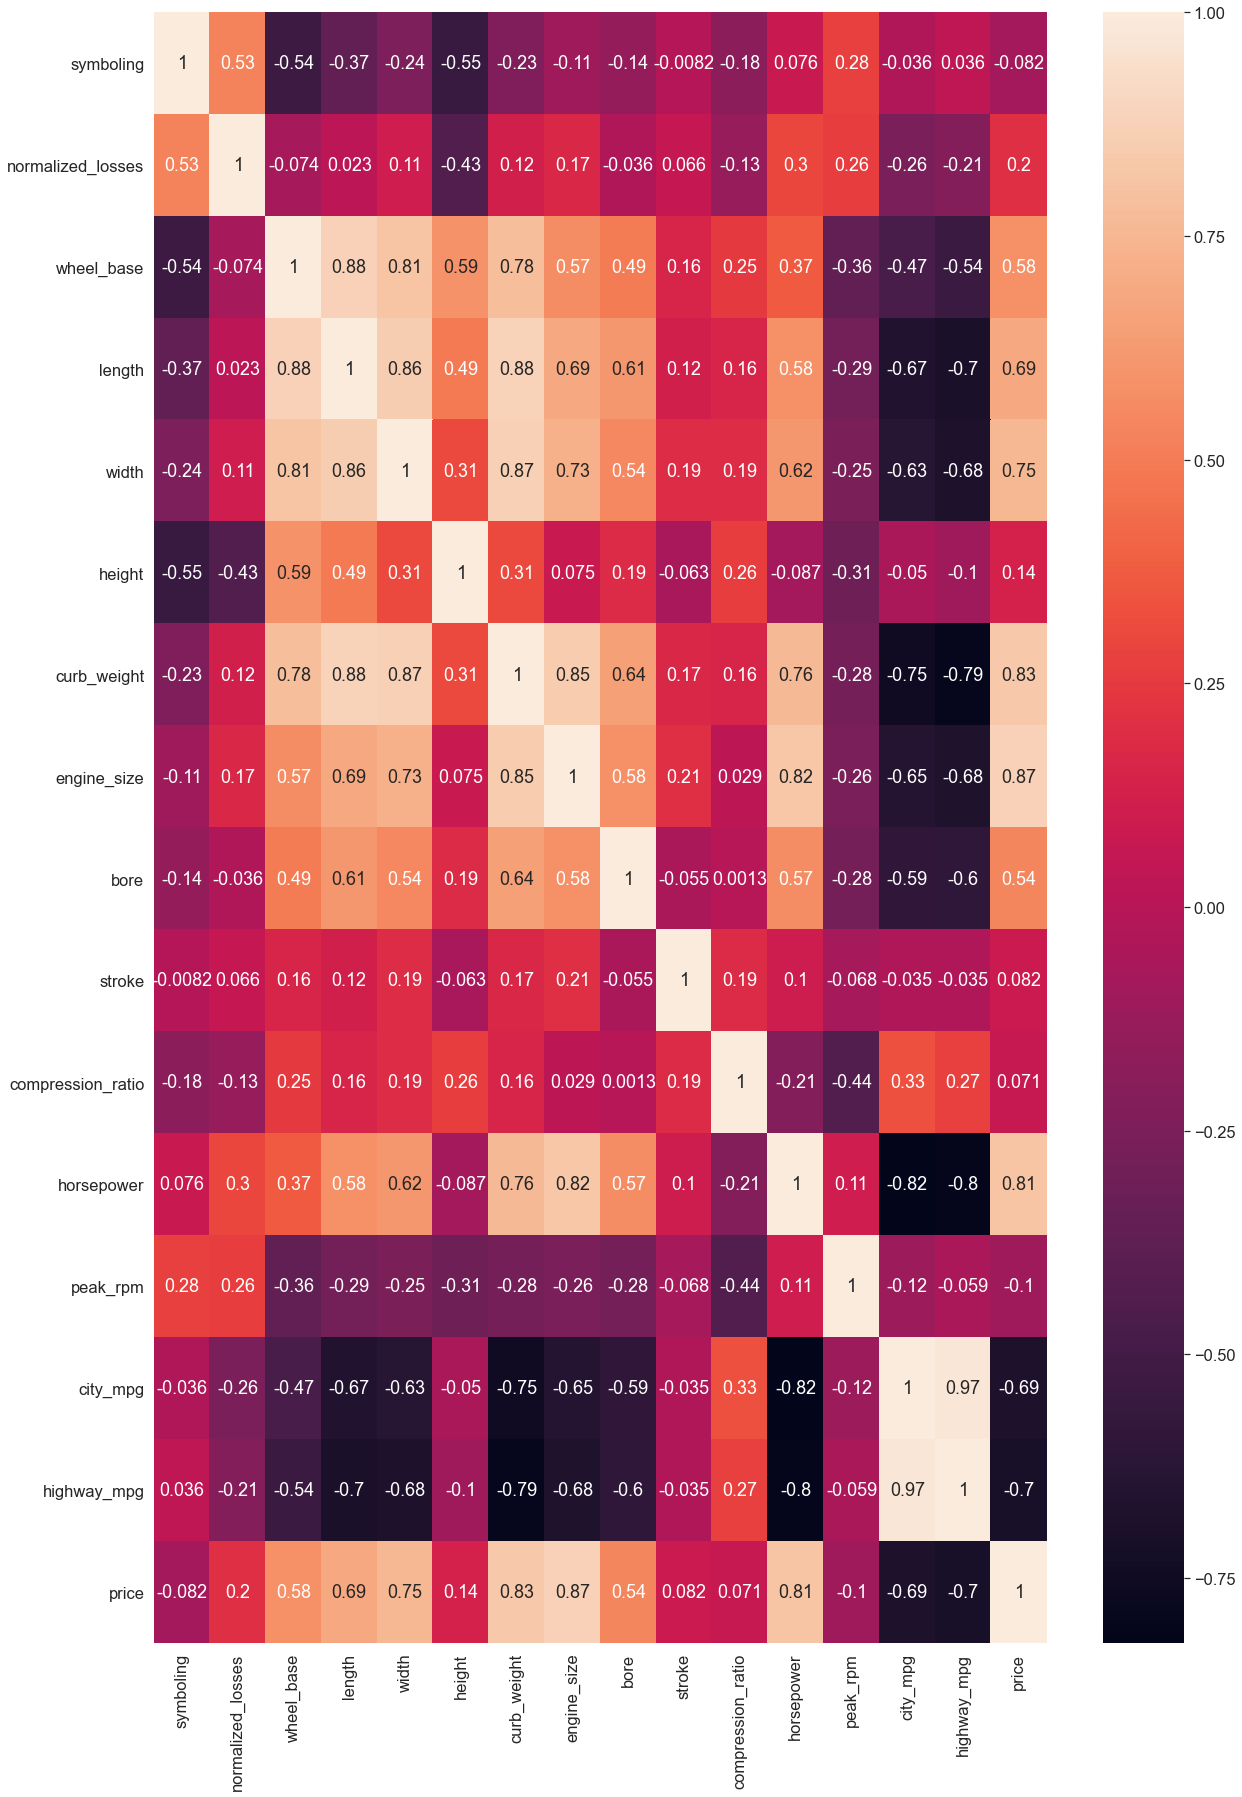

In [7]:
import seaborn as sns

plt.figure(figsize=(20, 30))
sns.set_theme()
sns.set_context("notebook", font_scale=1.5)
sns.heatmap(corr_matrix,annot=True)
plt.show()

----------

### Creating the Train and Test sets

Creating a test set at the beginning of the project avoid *data snooping* bias, i.e., "when you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected" (GÉRON, 2019). To avoid this problem, we divide our data into a train and a test set. 

Besides, to avoid introducing a sampling bias into the sets, we will use a stratified sampling, taking the car brand as the reference because it is the categorical variable with more unique values. By doing this, the test set generated using stratified sampling has symboling category proportions almost identical to those in the full dataset.

In [8]:
from sklearn.model_selection import train_test_split

car_X = df_data.drop('price',axis=1)
car_y = df_data['price']

X_train, X_test, y_train, y_test = train_test_split(car_X, car_y, test_size=0.2)

In [9]:
car_X_train = X_train.copy()
car_y_train = y_train.copy()
car_X_test = X_test.copy()
car_y_test = y_test.copy()

----------

### Preparing the data for ML algorithms

Before creating the ML models, we need to prepare the data so that the ML algorithms will work properly.

First, we need to clean missing values from the dataset. We have three option to deal with it [(GÉRON, 2019)](https://www.amazon.com.br/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646):

1. Get ride of the rows with missing values
2. Get ride of the whole attirbute that have missing values
3. Set the values to some value (the median, the mean, zero, etc)

We use the median value. We create a pipeline to be used with the models we will test next.

**Second, we need to put all the attributes in the same scale because "Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales" (GÉRON, 2019). To do this we standardized all the numerical variables**.

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def estimator_transf(estimator):
    imputer = SimpleImputer(strategy='median')
    pipeline = Pipeline(steps=[('i', imputer), ('m', estimator)])
    return pipeline

def estimator_scaler(estimator):
    imputer = SimpleImputer(strategy='median')
    pipeline = Pipeline(steps=[('i', imputer), ('scaler',StandardScaler()),('model', estimator)])
    return pipeline  

----------

## 2. Train ML model

After preparing the data set, we are ready to select and train our ML model to predict the car price.

We start with Linear Regression (LR) model. "A regression model, such as linear regression, models an output value based on a linear combination of input values" [(BROWNLEE, 2020)](https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/).

Then, we can try some regularized linear models. This kind of model constrain the weights of the model, avoiding overfitting (GÉRON, 2019). We try three regularized linear models [(BROWNLEE, 2016)](https://machinelearningmastery.com/machine-learning-with-python/):

1. Ridge regression. This model model uses the L2 regularization. It adds “squared magnitude” of coefficient as a penalty term to the loss function [(NAGPAL, 2017)](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c).
2. Lasso regression. This model model uses the L1 regularization. It adds “absolute value of magnitude” of coefficient as penalty term to the loss function (NAGPAL, 2017).
3. Elastic Net. This model combines the Ridge and the Lasso models. "It seeks to minimize the complexity of the regression model (magnitude and number of regression coefficients) by penalizing the model using both the L2-norm (sum squared coefficient values) and the L1-norm (sum absolute coefficient values)" (BROWNLEE, 2016).

Finally, we also try some nonlinear algorithms:

1. Classification and Regression Trees (CART). It uses "the train- ing data to select the best points to split the data in order to minimize a cost metric" (BROWNLEE, 2016).
2. Support Vector Regression (SVR). This model is an extension of the Support Vector Machines (SVM) developed for binary classification.
3. k-Nearest Neighbors (KNN). This model "locates the k most similar instances in the training dataset for a new data instance" (BROWNLEE, 2016).

The models are evaluated using the mean absolute error (MAE), root square mean error (RMSE), and R². RMSE punish larger errors more than smaller errors, inflating or magnifying the mean error score. This is due to the square of the error value. MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE is the simplest evaluation metric and most easily interpreted. R² tells you how much variance your model accounts for. In the case of the MAE and RMSE, the lower the better. But for R², the close the value is to 1, the better ([HALE, 2020](https://towardsdatascience.com/which-evaluation-metric-should-you-use-in-machine-learning-regression-problems-20cdaef258e); [BROWNLEE, 2021](https://machinelearningmastery.com/regression-metrics-for-machine-learning/)).

Besides, "the key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness" (BROWNLEE, 2016). In this project, we do this by using the same split in the cross validation. We use the KFold function from the sklearn library with a random value rs as the random_satate parameter. Although the rs value change everytime the notebook is run, once it is set, the same rs value is used in all the models. This guarantees that all the models are evaluated on the same data.

The result of the tests of the models with the training data show that **the CART is the best model**. It has the lowest MAE and RMSE, and the highest R².

However, differing scales of the raw data may be negatively impacting the performance of some of the models. Therefore, we test the models again, but this time we standardized the data set.

We can see that the performance of all models improved with standardization. However, CART is still outperforming other models. So we can choose CART as our ML model.

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def estimator_cross_val (model,estimator,pipe,matriz,rs):
    pipe_ = pipe(estimator)
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error','r2']
    kfold = KFold(n_splits=10, random_state=rs,shuffle=True)
    scores = cross_validate(pipe_,car_X_train,car_y_train,cv=kfold,scoring=scoring)
    
    mae_scores = -scores.get('test_neg_mean_absolute_error')
    mae_mean = mae_scores.mean()
    mae_std = mae_scores.std()
    
    rmse_scores = -scores.get('test_neg_root_mean_squared_error')
    rmse_mean = rmse_scores.mean()
    rmse_std = rmse_scores.std()
    
    r2_scores = scores.get('test_r2')
    r2_mean = r2_scores.mean()
    r2_std = r2_scores.std()
    
    results_ = [model,mae_mean,mae_std,rmse_mean,rmse_std,r2_mean,r2_std]
    results_ = pd.Series(results_, index = matriz.columns)
    results = matriz.append(results_,ignore_index=True)
    return results

In [12]:
from random import randrange
#from random import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import warnings

rs = randrange(10000)
matriz = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz = estimator_cross_val('Linear Regression',LinearRegression(),estimator_transf,matriz,rs)
matriz = estimator_cross_val('Ridge Regression',Ridge(),estimator_transf,matriz,rs)
matriz = estimator_cross_val('Lasso',Lasso(alpha=0.1),estimator_transf,matriz,rs)
matriz = estimator_cross_val('Elastic Net',ElasticNet(alpha=0.1, l1_ratio=0.5),estimator_transf,matriz,rs)
matriz = estimator_cross_val('KNN',KNeighborsRegressor(),estimator_transf,matriz,rs)
matriz = estimator_cross_val('CART',DecisionTreeRegressor(),estimator_transf,matriz,rs)
matriz = estimator_cross_val('SVR',SVR(),estimator_transf,matriz,rs)

matriz

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,2457.218091,735.789099,3257.364364,1083.388328,0.781495,0.108581
1,Ridge Regression,2461.716949,733.618904,3253.772862,1070.329305,0.781333,0.109197
2,Lasso,2457.299493,735.779031,3257.321193,1083.298084,0.781495,0.108587
3,Elastic Net,2471.843746,724.444913,3256.816528,1024.141119,0.778743,0.111676
4,KNN,2349.068750,875.036495,3671.345220,1497.256266,0.748218,0.087033
5,CART,1913.837500,557.120314,2748.389309,881.737102,0.839347,0.082578
6,SVR,5791.840419,2412.910367,8091.516323,3548.962322,-0.148211,0.164344


In [13]:
matriz2 = pd.DataFrame(columns=['model','MAE_mean','MAE_std','RMSE_mean','RMSE_std','R2_mean','R2_std'])

matriz2 = estimator_cross_val('Linear Regression',LinearRegression(),estimator_scaler,matriz2,rs)
matriz2 = estimator_cross_val('Ridge Regression',Ridge(),estimator_scaler,matriz2,rs)
matriz2 = estimator_cross_val('Lasso',Lasso(alpha=0.1),estimator_scaler,matriz2,rs)
matriz2 = estimator_cross_val('Elastic Net',ElasticNet(alpha=0.1, l1_ratio=0.5),estimator_scaler,matriz2,rs)
matriz2 = estimator_cross_val('KNN',KNeighborsRegressor(),estimator_scaler,matriz2,rs)
matriz2 = estimator_cross_val('CART',DecisionTreeRegressor(),estimator_scaler,matriz2,rs)
matriz2 = estimator_cross_val('SVR',SVR(),estimator_scaler,matriz2,rs)
matriz2

,model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,R2_mean,R2_std
0,Linear Regression,2457.218091,735.789099,3257.364364,1083.388328,0.781495,0.108581
1,Ridge Regression,2439.942017,737.054556,3239.611224,1084.018909,0.784880,0.106845
2,Lasso,2457.154044,735.683465,3257.183680,1083.306040,0.781522,0.108569
3,Elastic Net,2412.150627,753.706819,3230.329043,1069.710440,0.788541,0.102691
4,KNN,2636.675000,1199.478722,3922.053347,2041.273038,0.710114,0.177122
5,CART,1978.418750,634.972604,2814.307308,944.475788,0.835203,0.088250
6,SVR,5780.611127,2412.470318,8081.503511,3549.062777,-0.145053,0.164931


---------

# 3. Evaluate the ML model

Now evaluate the performance of our ML model in the test set, to see how it perform with unseen data.

We see that the model performs as expected with the test set. We verify that MAE and RMSE both have values close to those we estimated for the train data.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pipe = estimator_scaler(DecisionTreeRegressor())
pipe.fit(car_X_train,car_y_train)

car_y_hat = pipe.predict(car_X_test)
final_mae = mean_absolute_error(car_y_test,car_y_hat)
final_mse = mean_squared_error(car_y_test,car_y_hat)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(car_y_test,car_y_hat)
print('MAE:  %.2f'%final_mae,'\nRMSE: %.2f'%final_rmse,'\nR2:   %.2f'%final_r2)

MAE:  1483.10 
RMSE: 2108.05 
R2:   0.88


----------------------

## 4. Conclusion

In this notebook, we were able to create a model to predict car prices base on its attributes. After preparing the data, we tried four different regression models. 

We verified that the CART model performed best with the train set. Then, we evaluated this model using the test set we separeted during the data preparation.

**We verify that the model had the same performance with the test set as with the train set. Moreover, the values of the MAE and RMSE are accepbtable for this kind of prediction and the R² is great**. 